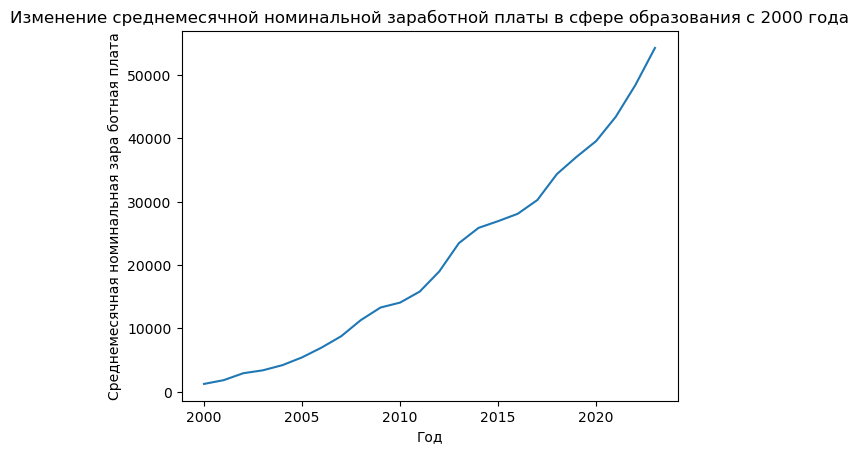

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#график по сфере образования
zp1 = pd.read_csv("https://raw.githubusercontent.com/sbrnvv/CourseProject/main/2000-2016(1).csv", delimiter=';', on_bad_lines='skip')
zp2 = pd.read_csv("https://raw.githubusercontent.com/sbrnvv/CourseProject/main/2017-2023(1).csv", delimiter=';', on_bad_lines='skip')
years1 = zp1.columns[1:].astype(int)
zp1o = zp1[zp1['Отрасли'] == 'Образование'].values[0][1:]
years2 = zp2.columns[1:-1].astype(int)
zp2o = zp2[zp2['Отрасль'] == 'образование'].values[0][1:-1]
zp2o[0] = int(zp2o[0])
zpo = np.concatenate((zp1o, zp2o))
years = np.concatenate((years1, years2))
plt.title('Изменение среднемесячной номинальной заработной платы в сфере образования с 2000 года')
plt.xlabel('Год')
plt.ylabel('Среднемесячная номинальная зара ботная плата')
plt.plot(years, zpo, '-')

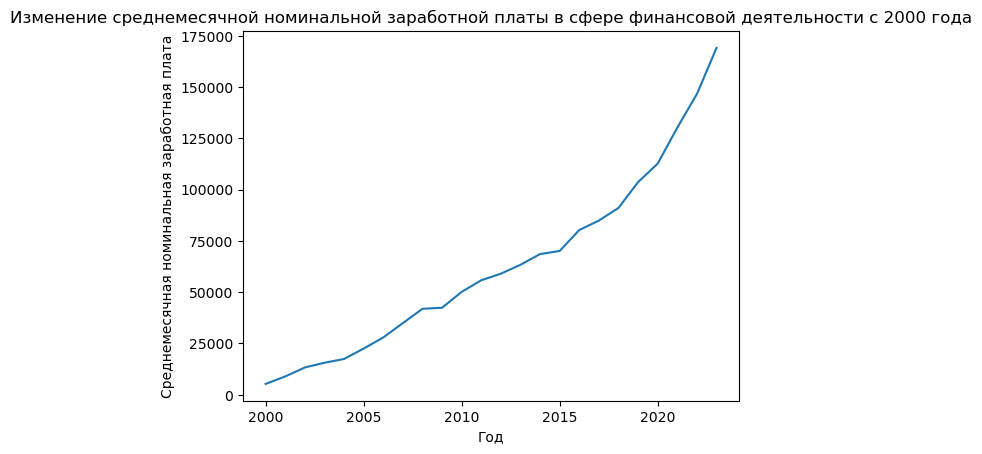

In [14]:
#график по сфере финансовой деятельности
zp1f = zp1[zp1['Отрасли'] == 'Финансовая деятельность'].values[0][1:]
zp2f = zp2[zp2['Отрасль'] == 'деятельность финансовая и страховая'].values[0][1:-1]
zp2f[0] = int(zp2f[0])
zpf = np.concatenate((zp1f, zp2f))
plt.title('Изменение среднемесячной номинальной заработной платы в сфере финансовой деятельности с 2000 года')
plt.xlabel('Год')
plt.ylabel('Среднемесячная номинальная заработная плата')
plt.plot(years, zpf, '-')

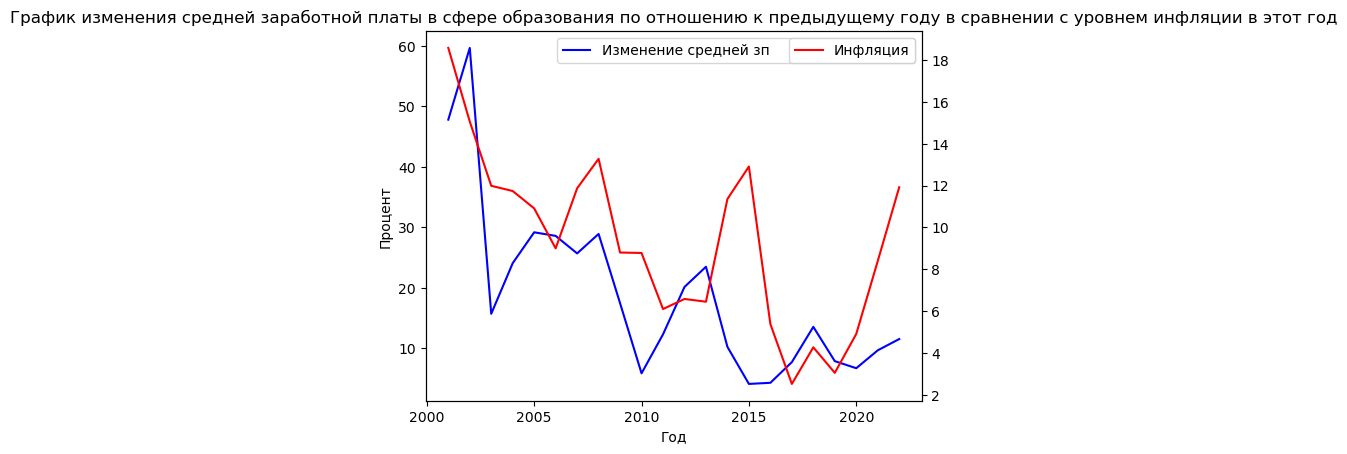

In [15]:
#сравнение прироста зарплаты и процента инфляции
realzpo = []
for i in range((len(zpo)-2)):
    real = ((zpo[i+1] - zpo[i])/ zpo[i])*100
    realzpo.append(real)
i = pd.read_csv("https://raw.githubusercontent.com/sbrnvv/CourseProject/main/infl%202000-2023(1).csv", delimiter=';', on_bad_lines='skip')
yearsinfl = i.columns[1:].astype(int)
infl = i[i['Год'] == 'Всего'].values[0][1:]
fig, plt1 = plt.subplots()
plt2 = plt1.twinx()
plt1.set_title("График изменения средней заработной платы в сфере образования по отношению к предыдущему году в сравнении с уровнем инфляции в этот год")
plt1.set_xlabel('Год')
plt1.set_ylabel('Процент')
plt1.plot(years[1:-1], realzpo, "-", color = 'b', label = 'Изменение средней зп                                ' )
plt2.plot(years[1:-1], infl[1:-1], "-", color = 'r', label = 'Инфляция' )
plt1.legend()
plt2.legend()

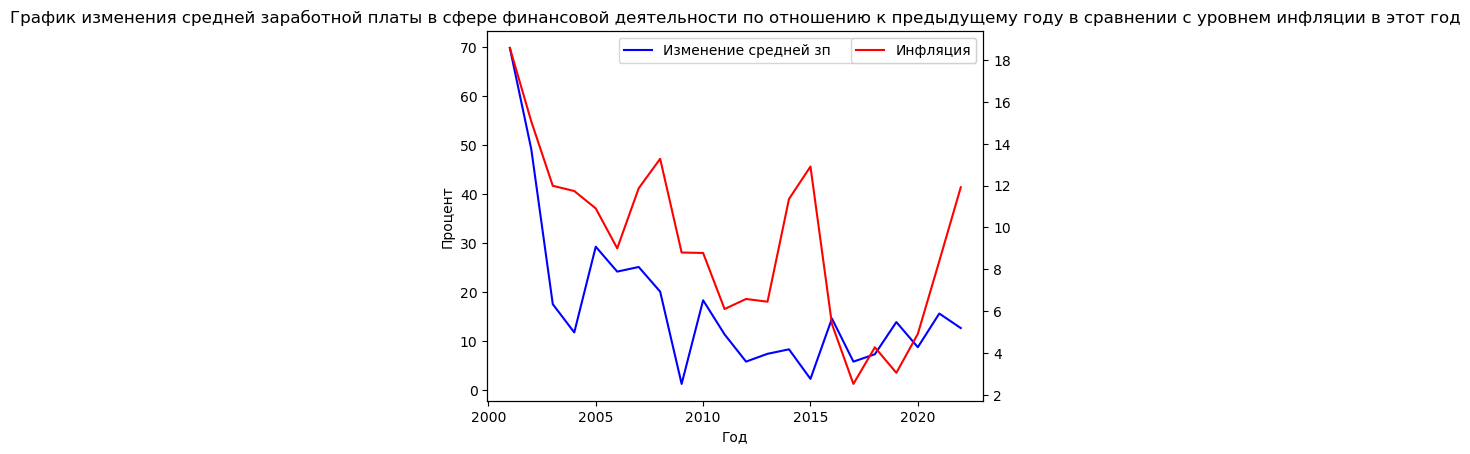

In [16]:
#сравнение прироста зарплаты и процента инфляции
realzpf = []
for i in range((len(zpf)-2)):
    real = ((zpf[i+1] - zpf[i])/ zpf[i])*100
    realzpf.append(real)
i = pd.read_csv("https://raw.githubusercontent.com/sbrnvv/CourseProject/main/infl%202000-2023(1).csv", delimiter=';', on_bad_lines='skip')
yearsinfl = i.columns[1:].astype(int)
infl = i[i['Год'] == 'Всего'].values[0][1:]
fig, plt1 = plt.subplots()
plt2 = plt1.twinx()
plt1.set_title("График изменения средней заработной платы в сфере финансовой деятельности по отношению к предыдущему году в сравнении с уровнем инфляции в этот год")
plt1.set_xlabel('Год')
plt1.set_ylabel('Процент')
plt1.plot(years[1:-1], realzpf, "-", color = 'b', label = 'Изменение средней зп                                ' )
plt2.plot(years[1:-1], infl[1:-1], "-", color = 'r', label = 'Инфляция' )
plt1.legend()
plt2.legend()

Text(0, 0.5, 'Средняя заработная плата')

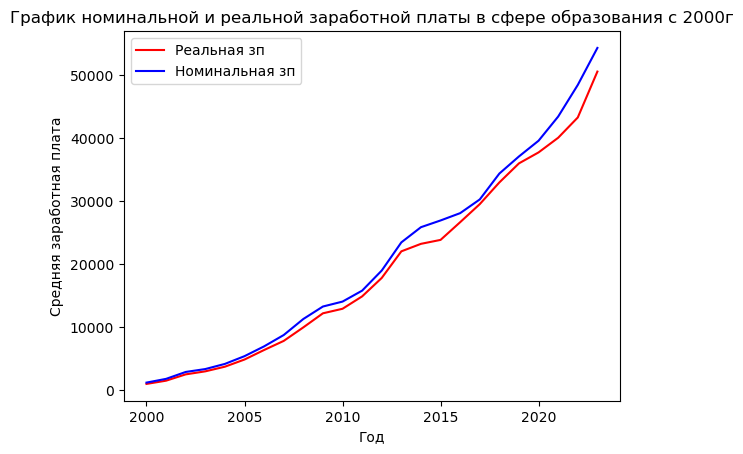

In [17]:
#график по реальным и номинальным зп
i = pd.read_csv("https://raw.githubusercontent.com/sbrnvv/CourseProject/main/infl%202000-2023(1).csv", delimiter=';', on_bad_lines='skip')
infl = i[i['Год'] == 'Всего'].values[0][1:]
urinfl = []
for i in range(len(infl)):
    infl[i] = (infl[i]+100)/100
    urinfl.append(infl[i])
zporeal = []
for a in range(len(zpo)):
    zporeal.append(zpo[a]/urinfl[a])
plt.plot(years, zporeal, '-', color = 'r',label = 'Реальная зп' )
plt.plot(years, zpo, '-', color = 'b',label = 'Номинальная зп')  
plt.legend()
plt.title('График номинальной и реальной заработной платы в сфере образования с 2000г')
plt.xlabel('Год')
plt.ylabel('Средняя заработная плата')

Text(0, 0.5, 'Средняя заработная плата')

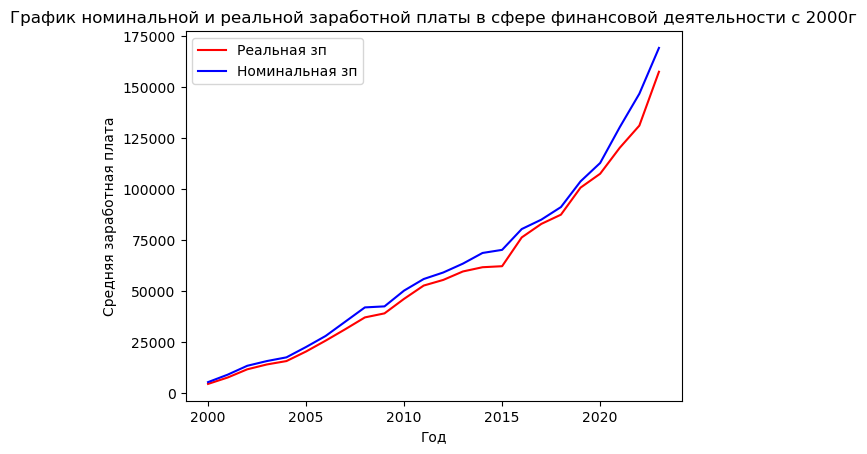

In [18]:
#график по реальным и номинальным зп
zpfreal = []
for a in range(len(zpf)):
    zpfreal.append(zpf[a]/urinfl[a])
plt.plot(years, zpfreal, '-', color = 'r',label = 'Реальная зп')
plt.plot(years, zpf, '-', color = 'b', label = 'Номинальная зп')  
plt.legend()
plt.title('График номинальной и реальной заработной платы в сфере финансовой деятельности с 2000г')
plt.xlabel('Год')
plt.ylabel('Средняя заработная плата')

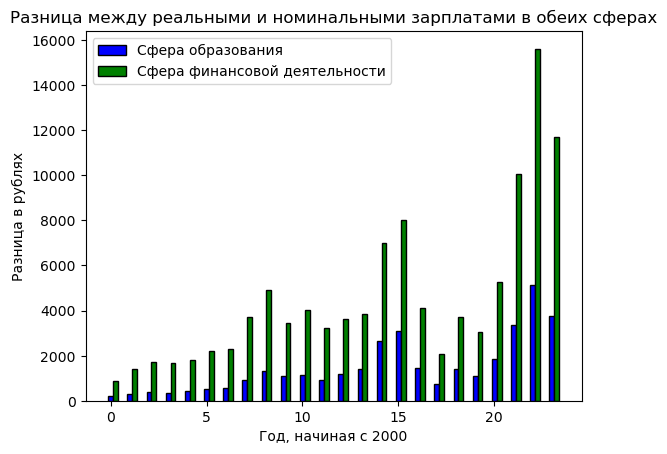

In [19]:
#разница между реальными и номинальными зп в образовании
razno = []
raznf = []
for j in range(len(zpf)):
    raznf.append(zpf[j]-zpfreal[j])
for i in range(len(zpo)):
    razno.append(zpo[i]-zporeal[i])
n = len(zpo)
r = np.arange(n) 
width = 0.25
plt.bar(r, razno, color = 'b', width = width, edgecolor = 'black', label='Сфера образования') 
plt.bar(r + width, raznf, color = 'g', width = width, edgecolor = 'black', label='Сфера финансовой деятельности') 
plt.xlabel("Год, начиная с 2000") 
plt.ylabel("Разница в рублях") 
plt.title("Разница между реальными и номинальными зарплатами в обеих сферах") 
plt.legend() 